In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# define global constants
images_filepath = "./CS4243_2023_images_small/"

In [3]:
# utility functions
"""
img: The input grayscale image.
GL: Number of gray levels.
d: The distance between pixel pairs.
t: The angle (in degrees) specifying the direction of pixel pairs.
"""
def am_glcm_faster(img, GL, d, t):
    ccmm = np.zeros([GL, GL])
    if t==0:
        im_target = img[:,d:]
        im_value = img[:,:-d]
        '''
        1 2 3 4 5 6 7 8 9 10  original
        1 2 3 4 5 6 7 8 9     target
          2 3 4 5 6 7 8 9 10  value
        '''
    elif t==45:
        im_target = img[d:,d:]
        im_value = img[:-d, :-d]
    elif t==90:
        im_target = img[d:,:]
        im_value = img[:-d, :]
    elif t==135:
        im_target = img[:-d, :-d]
        im_value = img[d:,d:]
    else:
        raise NotImplementedError('t options: 0, 45, 90, 135 only')
    assert im_target.shape==im_value.shape
    ref_gls = np.unique(im_value)
    # print(ref_gls)
    for ref in ref_gls:
        #ref: 80
        target_values = im_target[im_value == ref]
        #target_values: [ 98,  89,  99, 100]
        target_gls = np.unique(target_values)
        #[ 89,  98,  99, 100]
        for target in target_gls:
              
               ccmm[ref, target] = (target_values==target).sum()
    return ccmm

def glcm_energy(gl):
    return np.sum(np.multiply(gl,gl))

def am_power(a):
    dim1 = a.shape
    if len(dim1)==2:
        sz = dim1[0] * dim1[1] 
    else:
        sz = dim1[0] * dim1[1] * dim1[2]
    pa = np.sum( np.double(a)**2 )
    pa = pa / sz
    return pa 

# Q1

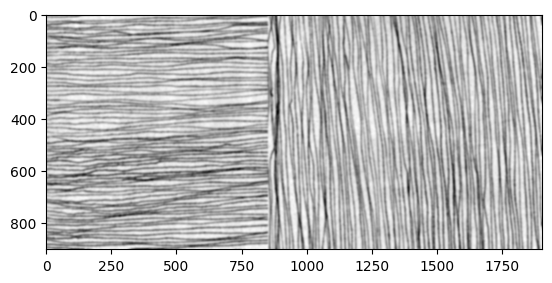

In [4]:
a = cv2.cvtColor(cv2.imread(images_filepath + "collage1.bmp"), cv2.COLOR_BGR2GRAY)
plt.imshow(a, cmap="gray")

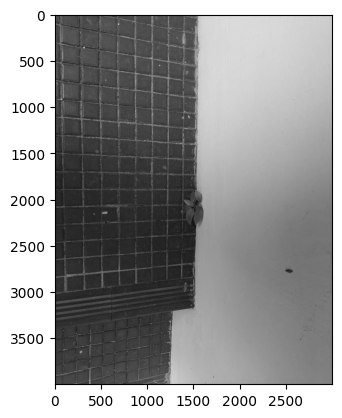

In [5]:
b = cv2.cvtColor(cv2.imread(images_filepath + "20230324_105524gl.jpg"), cv2.COLOR_BGR2GRAY)
plt.imshow(b, cmap="gray")

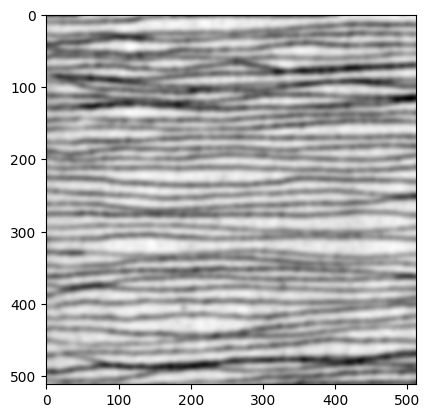

In [6]:
a5 = a[:512, 0:512]
plt.imshow(a5, cmap="gray")

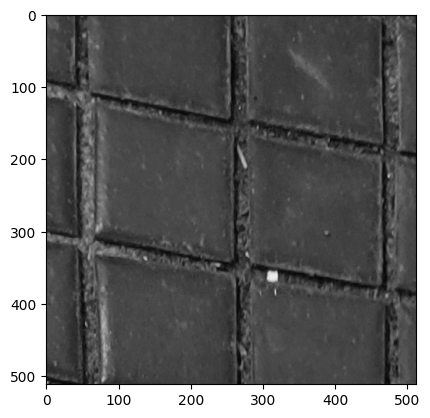

In [7]:
b5 = b[:512, :512]
plt.imshow(b5, cmap="gray")

In [8]:
glcm_a5_d3_t0 = am_glcm_faster(a5, 256, 3, 0)
glcm_a5_d3_t90 = am_glcm_faster(a5, 256, 3, 90)
glcm_b5_d3_t0 = am_glcm_faster(b5, 256, 3, 0)
glcm_b5_d3_t90 = am_glcm_faster(b5, 256, 3, 90)

In [9]:
f1 = {
    "f1_glcm_a5_d3_t0": glcm_energy(glcm_a5_d3_t0),
    "f1_glcm_a5_d3_t90": glcm_energy(glcm_a5_d3_t90),
    "f1_glcm_b5_d3_t0": glcm_energy(glcm_b5_d3_t0),
    "f1_glcm_b5_d3_t90": glcm_energy(glcm_b5_d3_t90)
}


print(sorted(f1.items(), key=lambda x:x[1]))

[('f1_glcm_a5_d3_t90', 23644310.0), ('f1_glcm_a5_d3_t0', 123233206.0), ('f1_glcm_b5_d3_t0', 132581438.0), ('f1_glcm_b5_d3_t90', 150995342.0)]


# Q2


In [10]:
L = np.array([1,2,1]) / 4
# or: L = np.array([1,2,1])
E = np.array([-1,0,1])
S = np.array([-1,2,-1])
llist = [L, E, S]

laws = []
for xs in llist:
    for ys in llist:
        xs = np.reshape(xs,(3,1))
        ys = np.reshape(ys,(1,3))
        L3L3 = np.matmul(xs,ys)  
        print(L3L3)
        laws.append(L3L3)

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
[[-0.25  0.    0.25]
 [-0.5   0.    0.5 ]
 [-0.25  0.    0.25]]
[[-0.25  0.5  -0.25]
 [-0.5   1.   -0.5 ]
 [-0.25  0.5  -0.25]]
[[-0.25 -0.5  -0.25]
 [ 0.    0.    0.  ]
 [ 0.25  0.5   0.25]]
[[ 1  0 -1]
 [ 0  0  0]
 [-1  0  1]]
[[ 1 -2  1]
 [ 0  0  0]
 [-1  2 -1]]
[[-0.25 -0.5  -0.25]
 [ 0.5   1.    0.5 ]
 [-0.25 -0.5  -0.25]]
[[ 1  0 -1]
 [-2  0  2]
 [ 1  0 -1]]
[[ 1 -2  1]
 [-2  4 -2]
 [ 1 -2  1]]


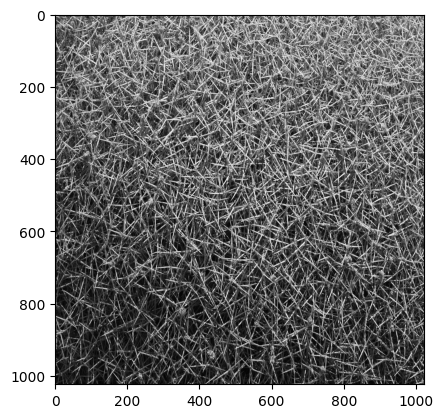

In [11]:
c = cv2.imread(images_filepath + "IMG_0054_1024bw.bmp")
plt.imshow(c)

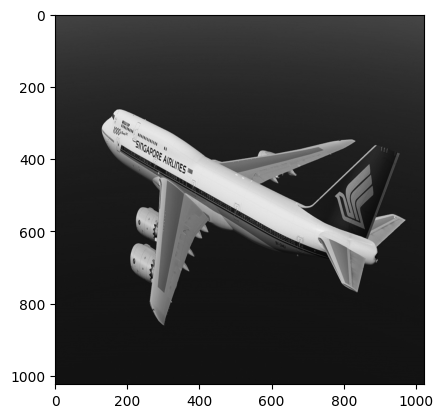

In [12]:
d = cv2.imread(images_filepath + "6ae-007_1024_bw.bmp")
plt.imshow(d)

In [13]:
c_laws = [cv2.filter2D(c, -1, f) for f in laws]
d_laws = [cv2.filter2D(d, -1, f) for f in laws]

c_laws_power = {"p_c_f" + str(i) : am_power(c_laws[i]) for i in range(len(c_laws))}
d_laws_power = {"p_d_f" + str(i) : am_power(d_laws[i]) for i in range(len(d_laws))}

print(sorted((c_laws_power | d_laws_power).items(), key=lambda x:x[1], reverse=True))

[('p_c_f0', 11494.777777671814), ('p_d_f0', 5602.862588882446), ('p_c_f8', 4172.190396308899), ('p_c_f5', 3860.060046195984), ('p_c_f4', 3160.2816953659058), ('p_c_f7', 2622.840732574463), ('p_c_f1', 1757.9039726257324), ('p_c_f2', 1735.262674331665), ('p_c_f3', 1314.157166481018), ('p_c_f6', 884.3464765548706), ('p_d_f4', 110.96645927429199), ('p_d_f5', 96.80512428283691), ('p_d_f1', 96.26849269866943), ('p_d_f8', 85.41726398468018), ('p_d_f7', 77.65265083312988), ('p_d_f3', 77.33382987976074), ('p_d_f2', 64.30005741119385), ('p_d_f6', 24.02619171142578)]


# Q3

Corrupt JPEG data: bad Huffman code


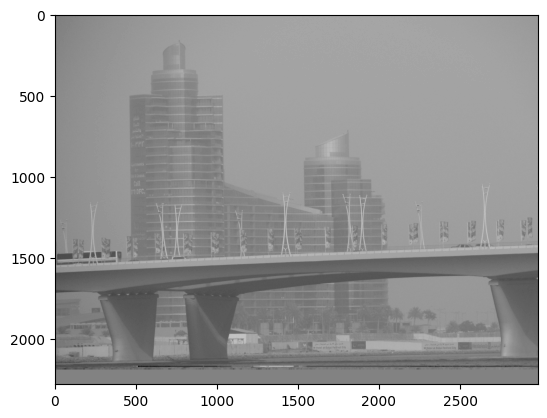

In [14]:
x = cv2.cvtColor(cv2.imread(images_filepath + "34.jpg"), cv2.COLOR_BGR2GRAY)
plt.imshow(x, cmap="gray")

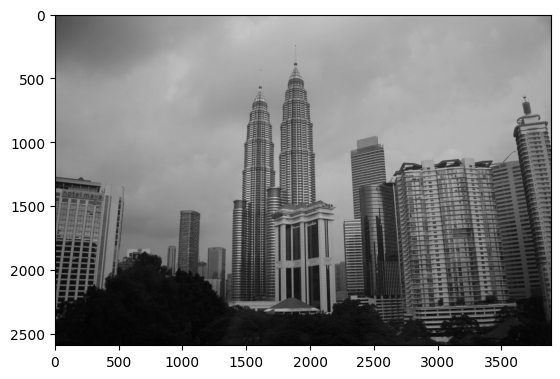

In [15]:
y = cv2.cvtColor(cv2.imread(images_filepath + "68.jpg"), cv2.COLOR_BGR2GRAY)
plt.imshow(y, cmap="gray")

In [16]:
h_lp = np.array([[0.111] * 3] * 3)
h_hp = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

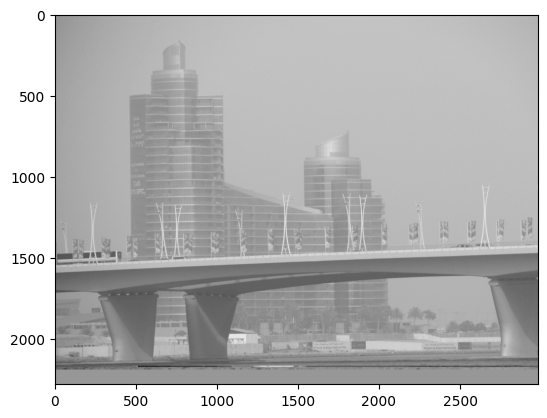

In [17]:
x_lp = cv2.filter2D(x, -1, h_lp)
plt.imshow(x_lp, cmap="gray")

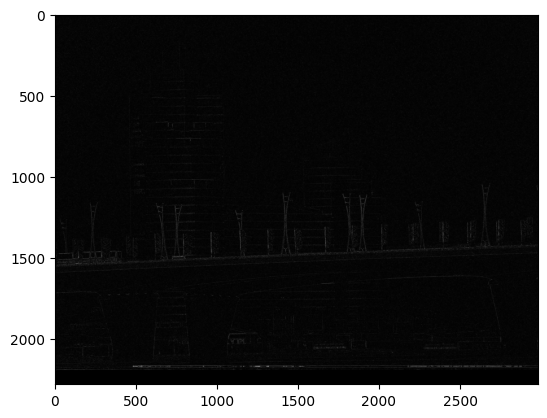

In [18]:
x_hp = cv2.filter2D(x, -1, h_hp)
plt.imshow(x_hp, cmap="gray")

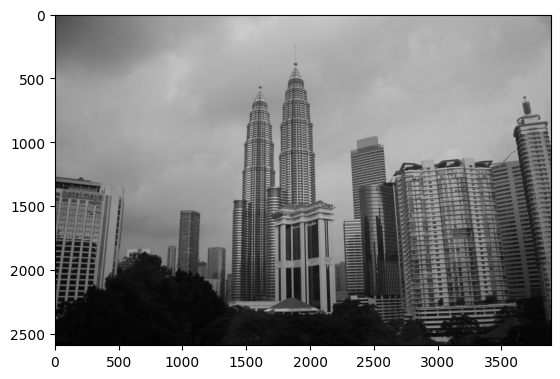

In [19]:
y_lp = cv2.filter2D(y, -1, h_lp)
plt.imshow(y_lp, cmap="gray")

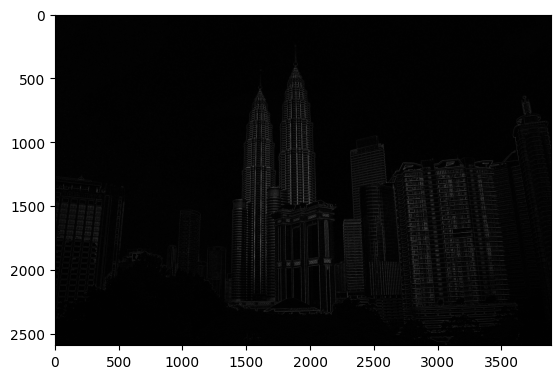

In [20]:
y_hp = cv2.filter2D(y, -1, h_hp)
plt.imshow(y_hp, cmap="gray")

In [21]:
p_x = am_power(x)
p_y = am_power(y)
p_x_lp = am_power(x_lp) 
p_x_hp = am_power(x_hp)
p_y_lp = am_power(y_lp)
p_y_hp = am_power(y_hp)

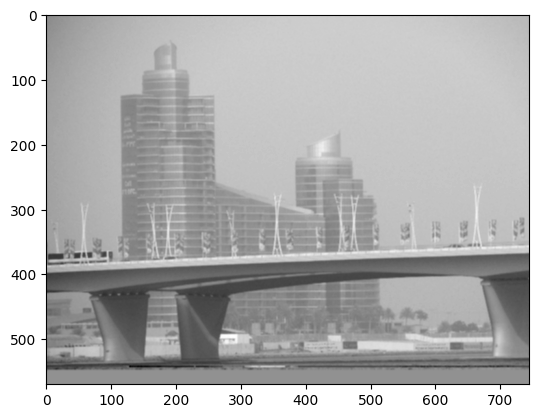

In [22]:
xd = cv2.resize(x, None, fx=0.25, fy=0.25, interpolation=cv2.INTER_LINEAR)
yd = cv2.resize(y, None, fx=0.25, fy=0.25, interpolation=cv2.INTER_LINEAR)

xd_lp = cv2.filter2D(xd, -1, h_lp)
xd_hp = cv2.filter2D(xd, -1, h_hp)
yd_lp = cv2.filter2D(yd, -1, h_lp)
yd_hp = cv2.filter2D(yd, -1, h_hp)

plt.imshow(xd_lp, cmap="gray")

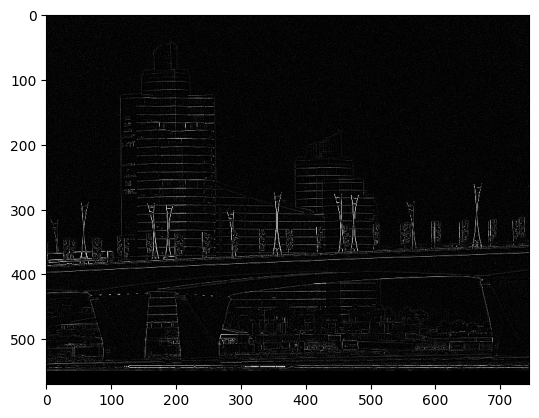

In [23]:
plt.imshow(xd_hp, cmap="gray")

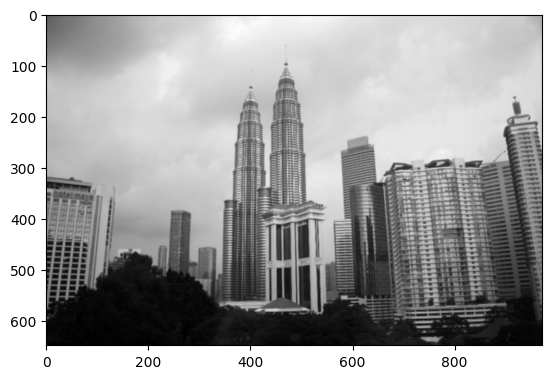

In [24]:
plt.imshow(yd_lp, cmap="gray")

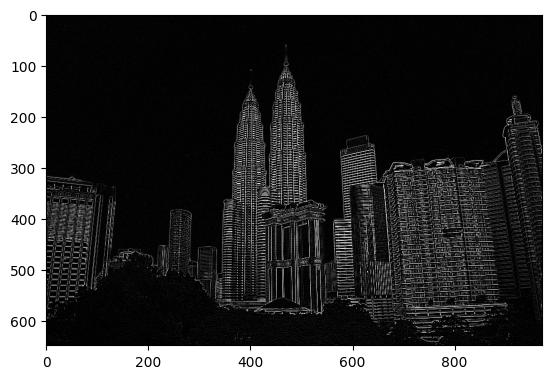

In [25]:
plt.imshow(yd_hp, cmap="gray")

In [26]:
p_xd = am_power(xd)
p_yd = am_power(yd)
p_xd_lp = am_power(xd_lp) 
p_xd_hp =  am_power(xd_hp) 
p_yd_lp = am_power(yd_lp)
p_yd_hp = am_power(yd_hp)

In [27]:
print("p_x", p_x)
print("p_y", p_y)
print("p_x_lp", p_x_lp)
print("p_x_hp", p_x_hp)
print("p_y_lp", p_y_lp)
print("p_y_hp", p_y_hp)
print("p_xd_lp", p_xd_lp)
print("p_xd_hp", p_xd_hp)
print("p_yd_lp", p_yd_lp)
print("p_yd_hp", p_yd_hp)

p_x 20056.0266807211
p_y 14890.060668728249
p_x_lp 20015.51270974993
p_x_hp 189.39628665750627
p_y_lp 14825.4991499049
p_y_hp 353.166348240709
p_xd_lp 20028.126035558696
p_xd_hp 637.5763970328505
p_yd_lp 14705.468305453946
p_yd_hp 2754.277939719555


In [28]:
p_x_lp / p_x

0.9979799602575263

In [29]:
p_y_lp / p_y

0.9956641198273328

In [30]:
p_x_hp / p_x

0.009443360326178856

In [31]:
p_y_hp / p_y

0.02371826120107224

In [32]:
p_xd_lp / p_xd

0.9971104613319798

In [33]:
p_yd_lp / p_yd

0.9869864768881682

In [34]:
p_xd_hp / p_xd

0.03174206584535671

In [35]:
p_yd_hp / p_yd

0.18485879018802798